### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

### Reading CSV & Information of Dataset

In [2]:
df=pd.read_csv(r"C:\Users\LENOVO\Downloads\SCMS_Delivery_History_Dataset.csv")
df

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


### Data PreProcessing & EDA

In [3]:
df.shape

(10324, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [5]:
df.nunique()

ID                              10324
Project Code                      142
PQ #                             1237
PO / SO #                        6233
ASN/DN #                         7030
Country                            43
Managed By                          4
Fulfill Via                         2
Vendor INCO Term                    8
Shipment Mode                       4
PQ First Sent to Client Date      765
PO Sent to Vendor Date            897
Scheduled Delivery Date          2006
Delivered to Client Date         2093
Delivery Recorded Date           2042
Product Group                       5
Sub Classification                  6
Vendor                             73
Item Description                  184
Molecule/Test Type                 86
Brand                              48
Dosage                             54
Dosage Form                        17
Unit of Measure (Per Pack)         31
Line Item Quantity               5065
Line Item Value                  8741
Pack Price  

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [8]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [9]:
df.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


### Handling Missing Values:

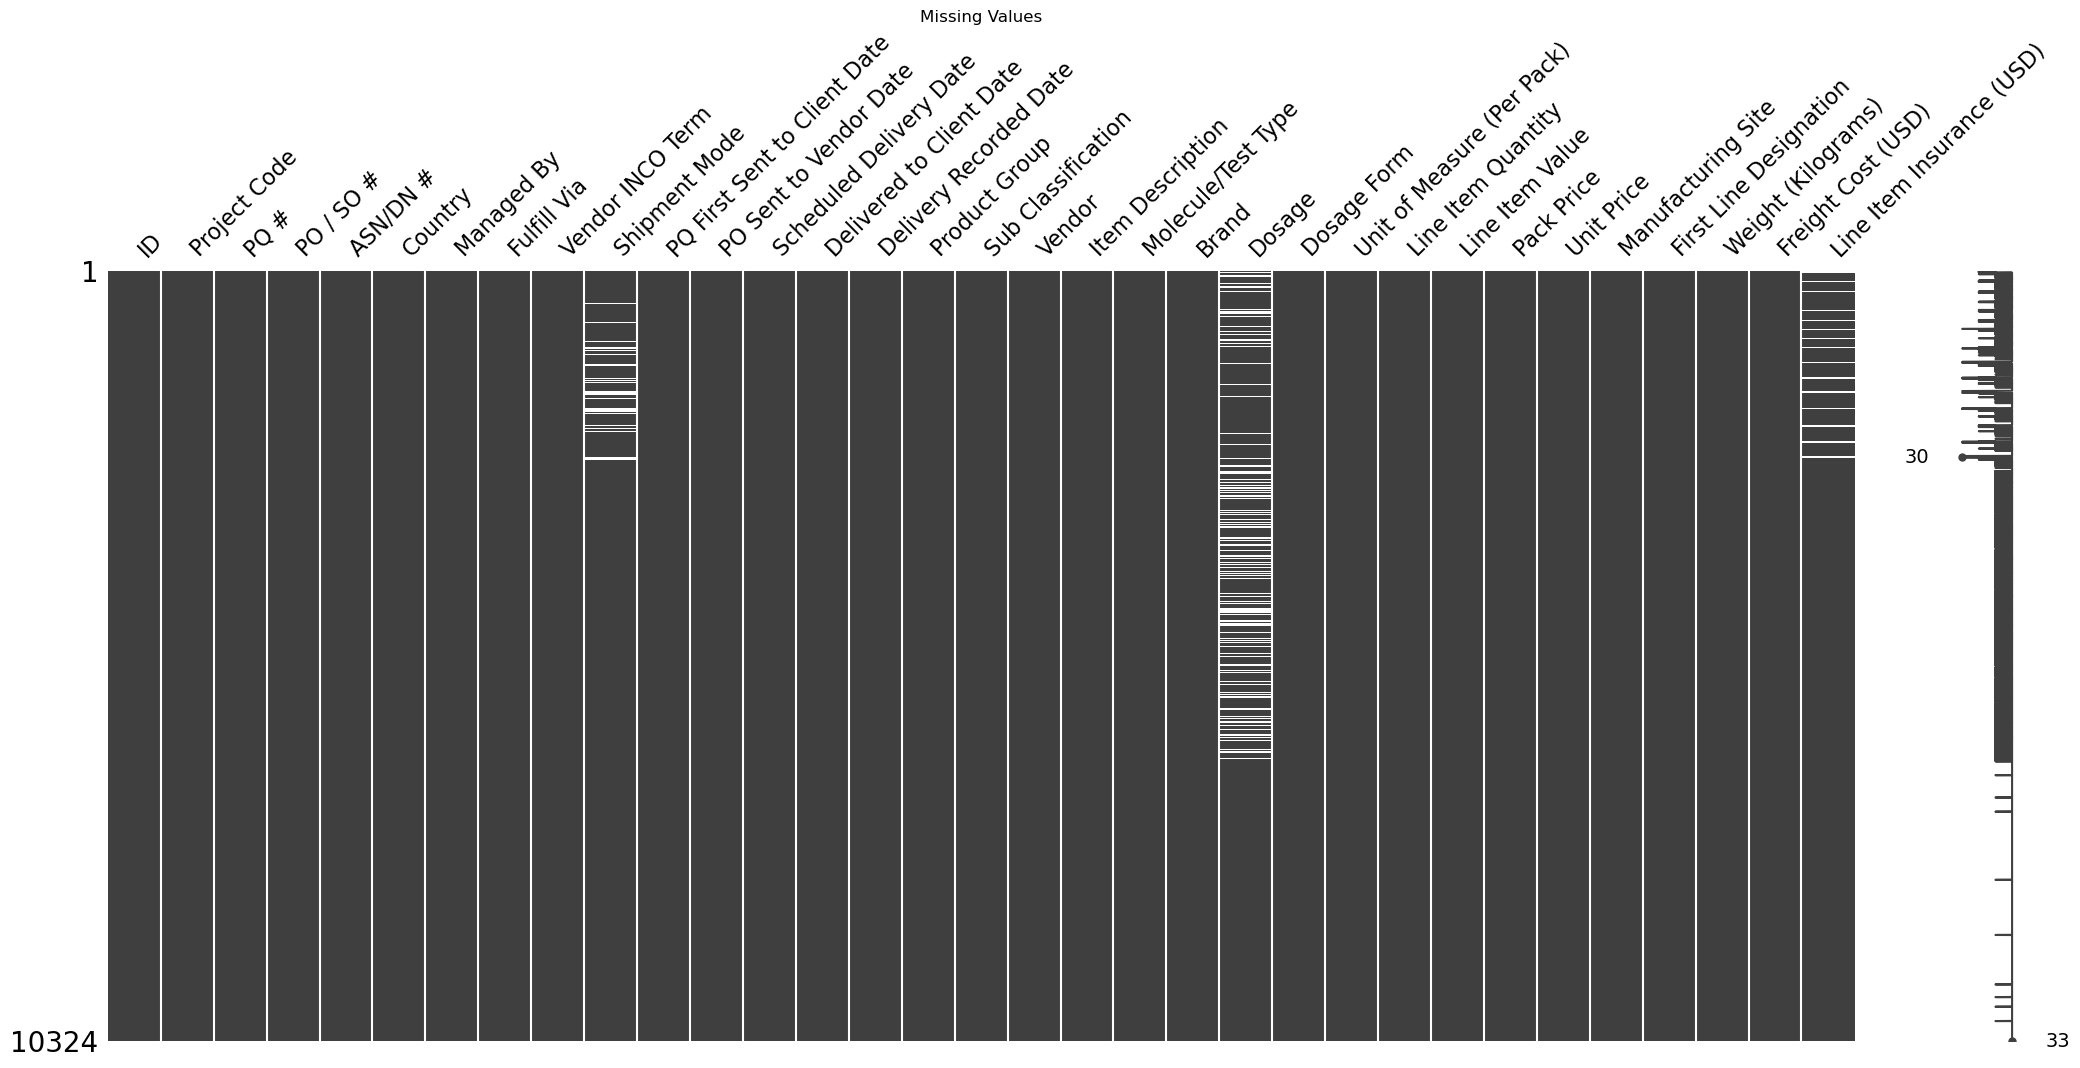

In [10]:
msno.matrix(df)
plt.title("Missing Values")
plt.show()

In [11]:
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [12]:
df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].mean(), inplace=True)  
df['Shipment Mode'].fillna(df['Shipment Mode'].mode()[0],inplace=True)
df['Dosage'].fillna(df['Dosage'].mode()[0],inplace=True)

In [13]:
# Replacing non-finite values with 0
df['Weight (Kilograms)']=df['Weight (Kilograms)'].apply(lambda x: 0 if not x.isdigit() else x)
df['Freight Cost (USD)']=df['Freight Cost (USD)'].apply(lambda x: 0 if not x.isdigit() else x)

### Changing dtypes of Columns

In [36]:
#Converting dates into Date-time format:
dt=['PQ First Sent to Client Date' ,'PO Sent to Vendor Date','Scheduled Delivery Date','Delivered to Client Date', 'Delivery Recorded Date']
for col in dt:
    df[col]=pd.to_datetime(df[col],errors='coerce')

In [37]:
#Converting the columns to categorical data type
categorical_columns=['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Managed By',
                       'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode', 'Product Group',
                       'Sub Classification', 'Vendor', 'Item Description', 'Molecule/Test Type',
                       'Brand', 'Dosage', 'Dosage Form', 'Manufacturing Site', 'First Line Designation']

df[categorical_columns]=df[categorical_columns].astype('category')

#Convert columns to integer data type
numerical_columns=['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value',
               'Pack Price', 'Unit Price', 'Weight (Kilograms)', 'Freight Cost (USD)',
               'Line Item Insurance (USD)']

df[numerical_columns]=df[numerical_columns].astype(int)

In [38]:
print("Catergorical Columns are: \n",categorical_columns)

Catergorical Columns are: 
 ['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode', 'Product Group', 'Sub Classification', 'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form', 'Manufacturing Site', 'First Line Designation']


In [39]:
print("Numerical Columns are: \n",numerical_columns)

Numerical Columns are: 
 ['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)']


In [40]:
df.dtypes

ID                                       int64
Project Code                          category
PQ #                                  category
PO / SO #                             category
ASN/DN #                              category
Country                               category
Managed By                            category
Fulfill Via                           category
Vendor INCO Term                      category
Shipment Mode                         category
PQ First Sent to Client Date    datetime64[ns]
PO Sent to Vendor Date          datetime64[ns]
Scheduled Delivery Date         datetime64[ns]
Delivered to Client Date        datetime64[ns]
Delivery Recorded Date          datetime64[ns]
Product Group                         category
Sub Classification                    category
Vendor                                category
Item Description                      category
Molecule/Test Type                    category
Brand                                 category
Dosage       

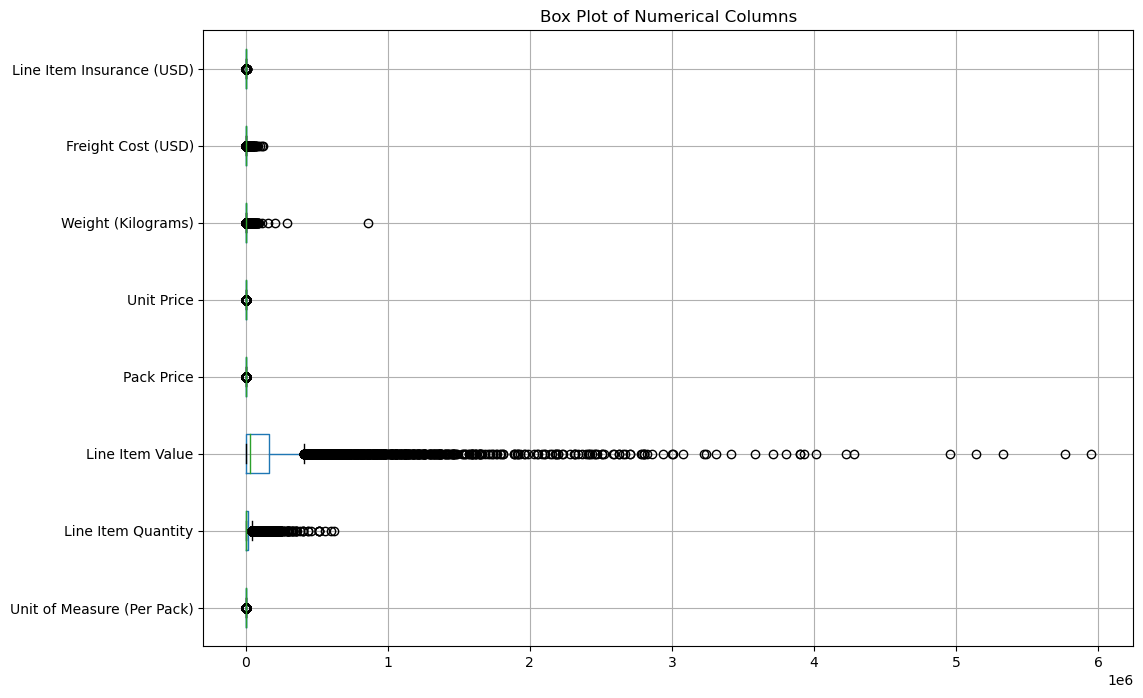

In [41]:
#Box Plot of Numerical Columns:
plt.figure(figsize=(12,8))
df[numerical_columns].boxplot(vert=False)
plt.title("Box Plot of Numerical Columns")
plt.show()

In [42]:
columns_to_zscore = ['Weight (Kilograms)', 'Line Item Value', 'Line Item Quantity']
z_scores = np.abs(stats.zscore(df[columns_to_zscore]))

outlier_mask = (z_scores < 2).all(axis=1)  
df=df[outlier_mask]

In [43]:
df.dropna(inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18904\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


### Label Encoding to Categorical Columns

In [44]:
df_copy=df.copy()  

label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df_copy[column] = label_encoders[column].fit_transform(df_copy[column])

### Scaling Numerical Values

In [45]:
scaler=MinMaxScaler()
df_copy[numerical_columns]=scaler.fit_transform(df_copy[numerical_columns])

In [46]:
df_copy

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Country_Str
2681,12929,14,448,1731,2237,16,2,0,5,0,...,0.000000,0.000096,0.059480,0.0,35,1,0.044781,0.0,0.000000,Kenya
2682,12935,37,108,740,1221,35,2,0,5,0,...,0.113461,0.089848,0.004461,0.0,48,1,0.041688,0.0,0.052302,Vietnam
2683,12959,40,301,1288,1838,36,2,0,5,0,...,0.064234,0.602899,0.059480,0.0,6,1,0.110995,0.0,0.293348,Zambia
2684,12973,35,708,359,509,15,2,0,5,0,...,0.003038,0.000822,0.001487,0.0,18,1,0.000915,0.0,0.000000,Haiti
2685,12981,34,92,704,917,29,2,0,5,0,...,0.000910,0.009612,0.066171,0.0,6,1,0.001699,0.0,0.005117,South Sudan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6575,82159,53,374,1508,2042,23,2,0,5,0,...,0.008174,0.004320,0.002974,0.0,20,1,0.000000,0.0,0.002274,Nigeria
6576,82172,37,559,2007,2666,35,2,0,5,0,...,0.159291,0.027096,0.000743,0.0,31,0,0.000000,0.0,0.027288,Vietnam
6577,82177,37,280,1245,1691,35,2,0,5,0,...,0.051140,0.021001,0.002230,0.0,31,0,0.000000,0.0,0.009665,Vietnam
6578,82203,35,62,651,869,15,2,0,6,0,...,0.000992,0.001480,0.008922,0.0,15,1,0.000958,0.0,0.000569,Haiti


### Feature Engineering:

In [47]:
correlation_matrix = df_copy.corr()
correlation_shipmentmode = correlation_matrix['Shipment Mode']

correlation_shipmentmode[correlation_shipmentmode>0.0005]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18904\1773569813.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_copy.corr()


ID                            0.004429
Project Code                  0.275001
PO / SO #                     0.101245
ASN/DN #                      0.180901
Country                       0.140583
Shipment Mode                 1.000000
Sub Classification            0.031336
Vendor                        0.266079
Item Description              0.034483
Molecule/Test Type            0.003529
Brand                         0.000967
Unit of Measure (Per Pack)    0.032593
Name: Shipment Mode, dtype: float64

In [48]:
selected_columns = [
    'Project Code',
    'Country',
    'Vendor',
    'Item Description',
    'Sub Classification',
    'Molecule/Test Type',
    'Shipment Mode',
    'Brand',
    'Weight (Kilograms)',
    'Unit of Measure (Per Pack)',
]
df_selected=df_copy[selected_columns]
df_selected.head()

,Project Code,Country,Vendor,Item Description,Sub Classification,Molecule/Test Type,Shipment Mode,Brand,Weight (Kilograms),Unit of Measure (Per Pack)
2681,14,16,39,57,2,24,0,8,0.044781,0.099099
2682,37,35,36,98,1,55,0,12,0.041688,0.059059
2683,40,36,39,57,2,24,0,8,0.110995,0.099099
2684,35,15,16,90,5,51,0,12,0.000915,0.059059
2685,34,29,39,57,2,24,0,8,0.001699,0.099099


In [49]:
df_selected['Shipment Mode'].value_counts()

0    2702
3     717
2     274
1      17
Name: Shipment Mode, dtype: int64